In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [19]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [20]:
temp = pd.read_excel("IDE_dataset.xlsx")
current_year = "July 2004"
dff = temp[temp['date'].eq(current_year)].sort_values(by='value', ascending=True)

In [21]:
colors = dict(zip(['Android Studio','Aptana','Atom','Coda 2','Code::Blocks','DrJava','Eclipse','Emacs','Eric Python','geany','IntelliJ','JCreator','JDeveloper','Julia Studio','Komodo','Light Table','Monkey Studio',
 'MonoDevelop','NetBeans','PhpStorm','pyCharm','Qt Creator','RubyMine','SharpDevelop','SlickEdit',
 'Sublime Text','Vim','Visual Studio','Visual Studio Code','Xamarin','Xcode','Zend Studio'],
 ['#4797a6', '#4a9aa7', '#4e9ca8', '#509dab', '#549eac', '#57a1ae', '#5ba3b0', '#5ea4b2', '#62a7b3', '#67aab6', '#68acb7', '#68acb7', '#70afba', '#73b0bc', '#78b3be', '#7bb6c0', '#7fb7c2', '#83b9c3', '#85bbc5', '#89bcc7', '#8cc0c9', '#90c2ca', '#92c2cb', '#97c5ce', '#9ac7d0', '#9ec9d1', '#a1cbd3', '#a5cdd5', '#a7cfd6', '#abd2d8', '#aed2da', '#b3d4dc']))
group_lk = temp.set_index('name')['type'].to_dict()

<BarContainer object of 32 artists>

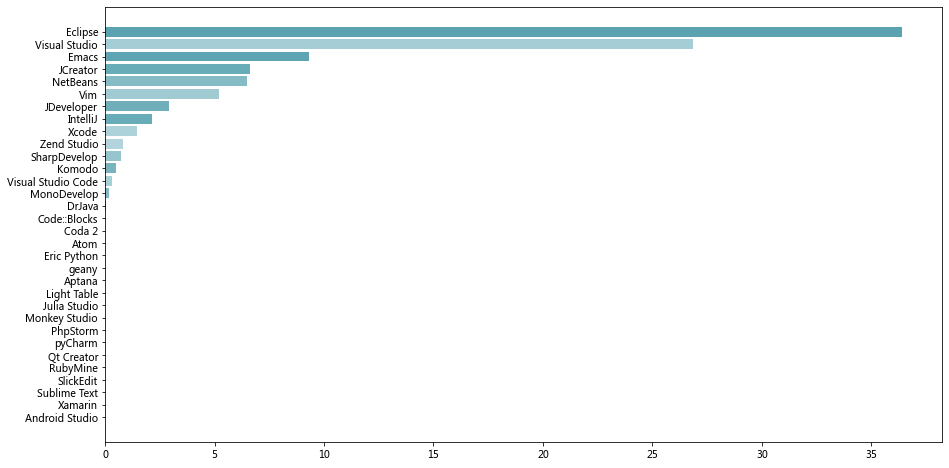

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])

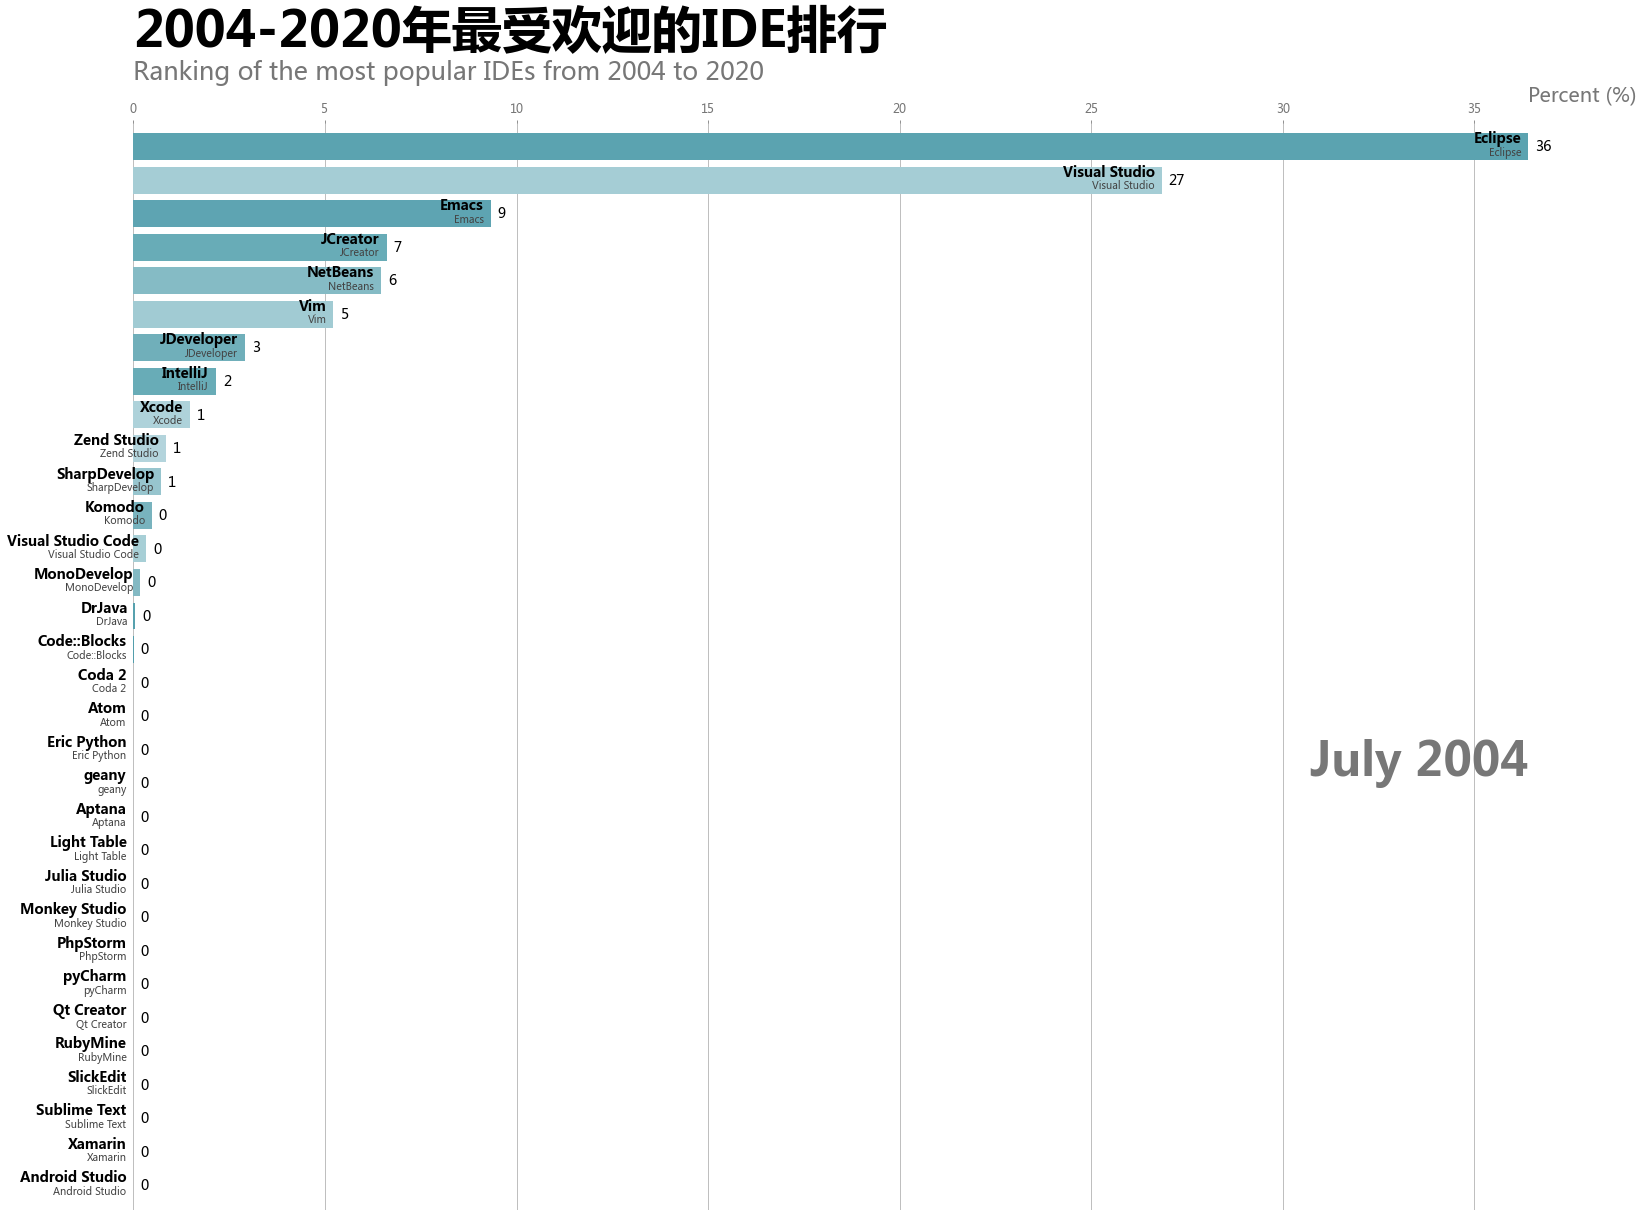

In [23]:
fig, ax = plt.subplots(figsize=(25, 20))

def draw_barchart(current_year):
    dff = temp[temp['date'].eq(current_year)].sort_values(by='value', ascending=True)
    ax.clear()

    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')

    # ... polished styles
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(1, 1.02, 'Percent (%)', transform=ax.transAxes, size=20, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.07, '2004-2020年最受欢迎的IDE排行',
            transform=ax.transAxes, size=50, weight=600, ha='left')
    ax.text(0, 1.04, 'Ranking of the most popular IDEs from 2004 to 2020', transform=ax.transAxes, size=25, color='#777777')

    #ax.text(1, 0, 'by @wenwei; credit @wenwei', transform=ax.transAxes, ha='right',
            #color='#777777',size=20, bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart("July 2004")


In [24]:
lis = temp[temp['name'].eq("Android Studio")]["date"]

Animation size has reached 21117645 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
MovieWriter ffmpeg unavailable; using Pillow instead.


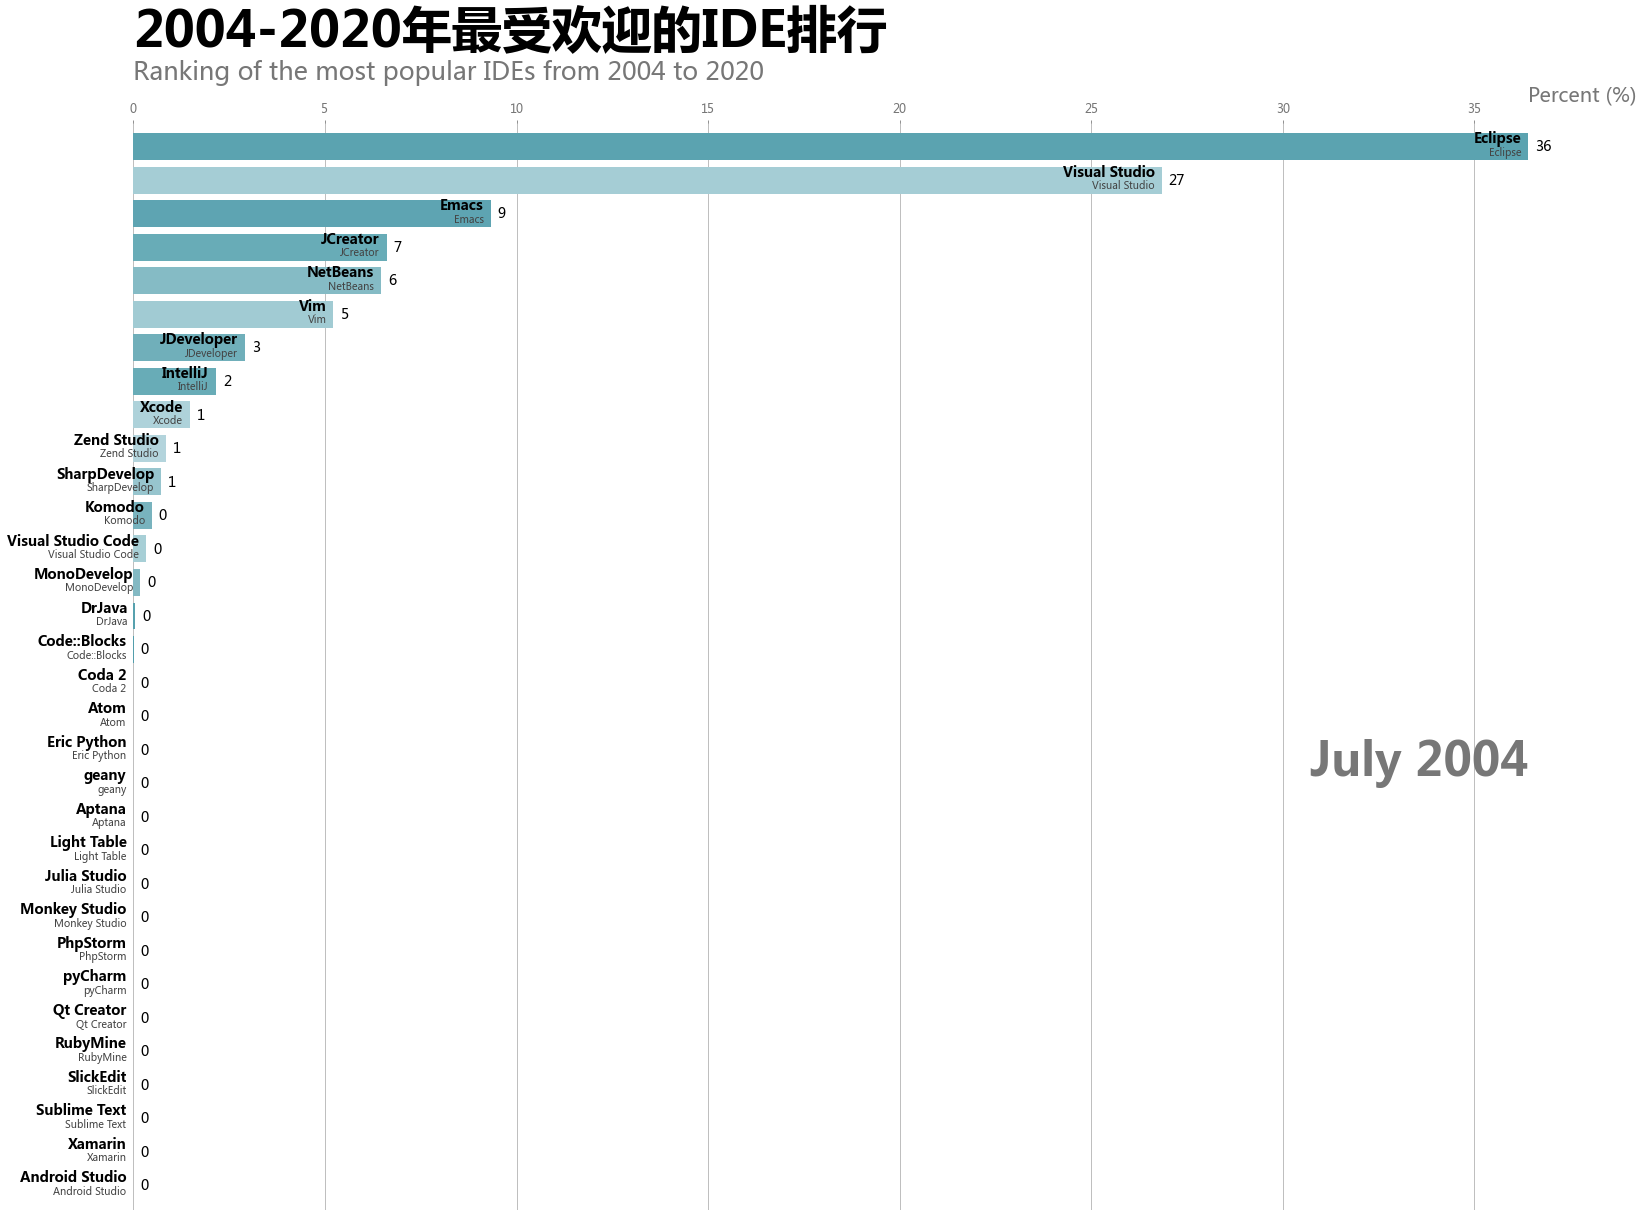

In [25]:
fig, ax = plt.subplots(figsize=(25, 20))

animator = animation.FuncAnimation(fig, draw_barchart, frames=lis)
HTML(animator.to_jshtml()) 
#animator.to_html5_video()
animator.save("temp.gif") 